In [78]:
import bz2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [79]:
df = pd.read_csv(bz2.open('./Bus_Breakdown_and_Delays.csv.bz2'), delimiter=';', thousands=',')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


In [80]:
df_no_outliers = df\
    [lambda df: df.Number_Of_Students_On_The_Bus <= 120]\
    [lambda df: df.Boro != 'All Boroughs']

In [82]:
df_no_outliers.Boro.value_counts()

Bronx              53688
Brooklyn           47467
Manhattan          43864
Queens             28893
Staten Island      10800
Westchester         5824
Nassau County       2726
New Jersey          1192
Rockland County      638
Connecticut          158
Name: Boro, dtype: int64

,index,Boro,ratio_of_rank0,ratio_of_rank1,ratio_of_rank2,ratio_of_rank3,ratio_of_rank4,ratio_of_rank5,ratio_of_rank6,ratio_of_rank7,ratio_of_rank8,ratio_of_rank9
0,Bronx,53688,1.000000,0.884127,0.817017,0.538165,0.201162,0.108479,0.050775,0.022202,0.011883,0.002943
1,Brooklyn,47467,1.131059,1.000000,0.924095,0.608697,0.227526,0.122696,0.057429,0.025112,0.013441,0.003329
2,Manhattan,43864,1.223965,1.082140,1.000000,0.658695,0.246216,0.132774,0.062147,0.027175,0.014545,0.003602
3,Queens,28893,1.858166,1.642855,1.518153,1.000000,0.373793,0.201571,0.094348,0.041256,0.022081,0.005468
4,Staten Island,10800,4.971111,4.395093,4.061481,2.675278,1.000000,0.539259,0.252407,0.110370,0.059074,0.014630
5,Westchester,5824,9.218407,8.150240,7.531593,4.961023,1.854396,1.000000,0.468063,0.204670,0.109547,0.027129
6,Nassau County,2726,19.694791,17.412693,16.090976,10.599046,3.961849,2.136464,1.000000,0.437271,0.234043,0.057960
7,New Jersey,1192,45.040268,39.821309,36.798658,24.239094,9.060403,4.885906,2.286913,1.000000,0.535235,0.132550
8,Rockland County,638,84.150470,74.399687,68.752351,45.286834,16.927900,9.128527,4.272727,1.868339,1.000000,0.247649
9,Connecticut,158,339.797468,300.424051,277.620253,182.867089,68.354430,36.860759,17.253165,7.544304,4.037975,1.000000


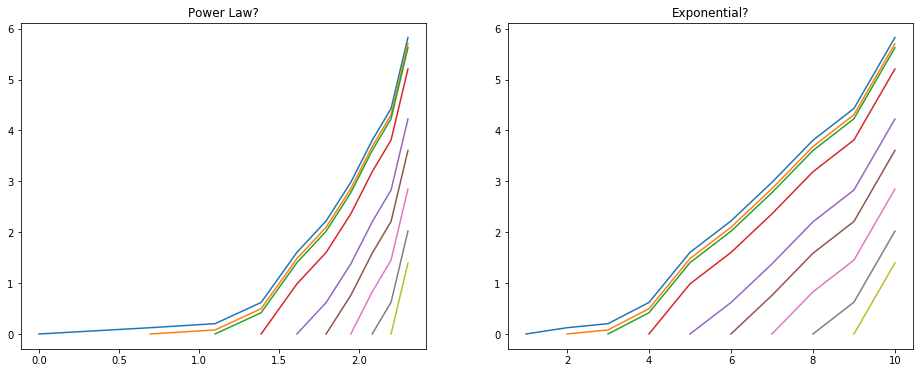

In [77]:
# Incident count per Boro doesn't seem Zipfian (i.e. not Power Law). Maybe exponential.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].set_title("Power Law?")
axes[1].set_title("Exponential?")
df_with_ratio = df_no_outliers.Boro.value_counts().reset_index()
for r in range(len(df_no_outliers.Boro.value_counts())):
    df_with_ratio = df_with_ratio\
        .assign(r=lambda df: df.Boro[r] / df.Boro)\
        .rename(columns={'r': 'ratio_of_rank%d' % r})
    axes[0].plot(np.log(np.array(df_with_ratio.index) + 1)[r:], 
                 np.log(df_with_ratio['ratio_of_rank%d' % r][r:]))
    axes[1].plot((np.array(df_with_ratio.index) + 1)[r:],
                 np.log(df_with_ratio['ratio_of_rank%d' % r][r:]))
df_with_ratio